In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import x_sin, sin_cos, generate_data, lstm_model

In [2]:
LOG_DIR = './ops_logs'
TIMESTEPS = 5
RNN_LAYERS = [{'steps': TIMESTEPS}]
DENSE_LAYERS = None
TRAINING_STEPS = 10000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

In [3]:
regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
                                      verbose=2,  steps=TRAINING_STEPS, optimizer='Adagrad',
                                      learning_rate=0.03, batch_size=BATCH_SIZE)

In [4]:
X, y = generate_data(np.sin, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], monitors=[validation_monitor], logdir=LOG_DIR)

TensorFlowEstimator(continue_training=False, optimizer=Adagrad, verbose=2, learning_rate=0.03, batch_size=100, steps=10000, n_classes=0, params=None, clip_gradients=5.0, class_weight=None)

In [5]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

MSE: 0.000105


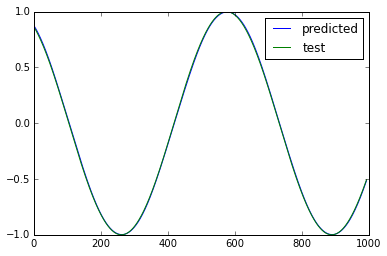

In [6]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])

In [23]:
LOG_DIR = './ops_logs'
TIMESTEPS = 10
RNN_LAYERS = [{'steps': TIMESTEPS}]
DENSE_LAYERS = None
TRAINING_STEPS = 10000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
                                      verbose=1,  steps=TRAINING_STEPS, optimizer='Adagrad',
                                      learning_rate=0.03, batch_size=BATCH_SIZE)

In [24]:
X, y = generate_data(sin_cos, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], monitors=[validation_monitor], logdir=LOG_DIR+'2')

TensorFlowEstimator(continue_training=False, optimizer=Adagrad, verbose=1, learning_rate=0.03, batch_size=100, steps=10000, n_classes=0, params=None, clip_gradients=5.0, class_weight=None)

In [25]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

MSE: 0.000227


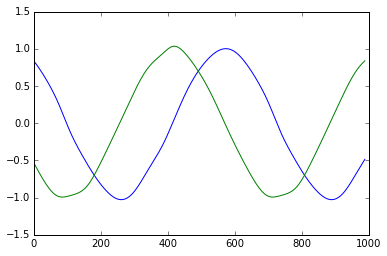

In [26]:
plt.plot(predicted)

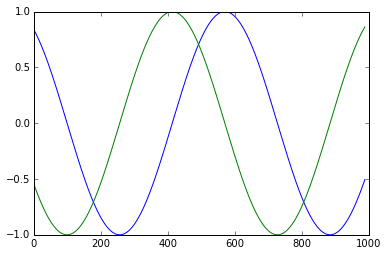

In [27]:
plt.plot(y['test'])

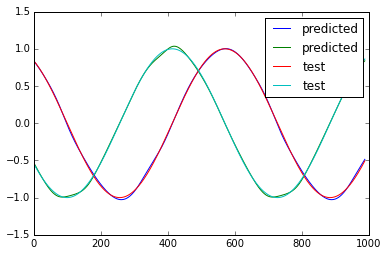

In [37]:
plot_predicted = plt.plot(predicted, label='predicted')
plot_test = plt.plot(y['test'], label='test')
plt.legend(handles=plot_predicted+plot_test)

In [19]:
LOG_DIR = './ops_logs'
TIMESTEPS = 40
RNN_LAYERS = [{'steps': TIMESTEPS}]
DENSE_LAYERS = [2]
TRAINING_STEPS = 130000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
                                      verbose=1,  steps=TRAINING_STEPS, optimizer='Adagrad',
                                      learning_rate=0.03, batch_size=BATCH_SIZE)

In [ ]:
X, y = generate_data(x_sin, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)

In [ ]:
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'], n_classes=0,
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], monitors=[validation_monitor], logdir=LOG_DIR)

In [20]:
predicted = regressor.predict(X['test'])
score = mean_squared_error(predicted, y['test'])
print "MSE: {}".format(score)

MSE: 61.024454351


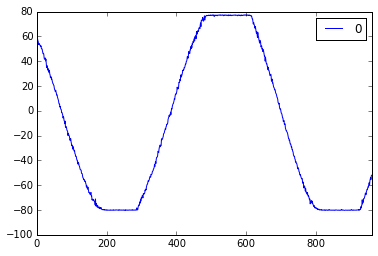

In [8]:
plt.plot(predicted)

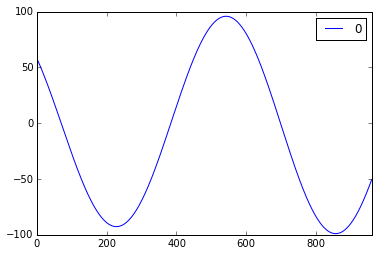

In [14]:
plt.plot(y['test'])

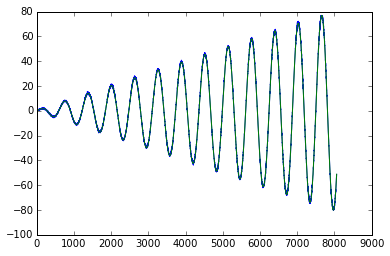

In [19]:
plt.plot(regressor.predict(X['train']))
plt.plot(y['train'])